Housing prices Competition

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (1460, 81)
Test shape: (1459, 80)


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [104]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


**TARGET** -  SalePrice

## EDA

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
for key, val in dict(train.isna().sum()).items():
    if val > 0:
        print('{0}: {1} missing values ({2}%)'.format(key, val, round(val / train.shape[0] *100, 2)))

LotFrontage: 259 missing values (17.74%)
Alley: 1369 missing values (93.77%)
MasVnrType: 872 missing values (59.73%)
MasVnrArea: 8 missing values (0.55%)
BsmtQual: 37 missing values (2.53%)
BsmtCond: 37 missing values (2.53%)
BsmtExposure: 38 missing values (2.6%)
BsmtFinType1: 37 missing values (2.53%)
BsmtFinType2: 38 missing values (2.6%)
Electrical: 1 missing values (0.07%)
FireplaceQu: 690 missing values (47.26%)
GarageType: 81 missing values (5.55%)
GarageYrBlt: 81 missing values (5.55%)
GarageFinish: 81 missing values (5.55%)
GarageQual: 81 missing values (5.55%)
GarageCond: 81 missing values (5.55%)
PoolQC: 1453 missing values (99.52%)
Fence: 1179 missing values (80.75%)
MiscFeature: 1406 missing values (96.3%)


In [40]:
numerical, categorical = [], []

df_dtypes = pd.DataFrame({'column': train.dtypes.index, 'type': train.dtypes.values})

for i in range(df_dtypes.shape[0]):
    if df_dtypes.at[i, 'type'] == 'object':
        categorical.append(df_dtypes.at[i, 'column'])
    else:
        numerical.append(df_dtypes.at[i, 'column'])
        
numerical.remove('Id')
numerical.remove('SalePrice')

In [41]:
print('Численные признаки ({0}): {1}'.format(len(numerical), numerical))
print('Категориальные признаки: ({0}): {1}'.format(len(categorical), categorical))

Численные признаки (36): ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Категориальные признаки: (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu'

### Numerical

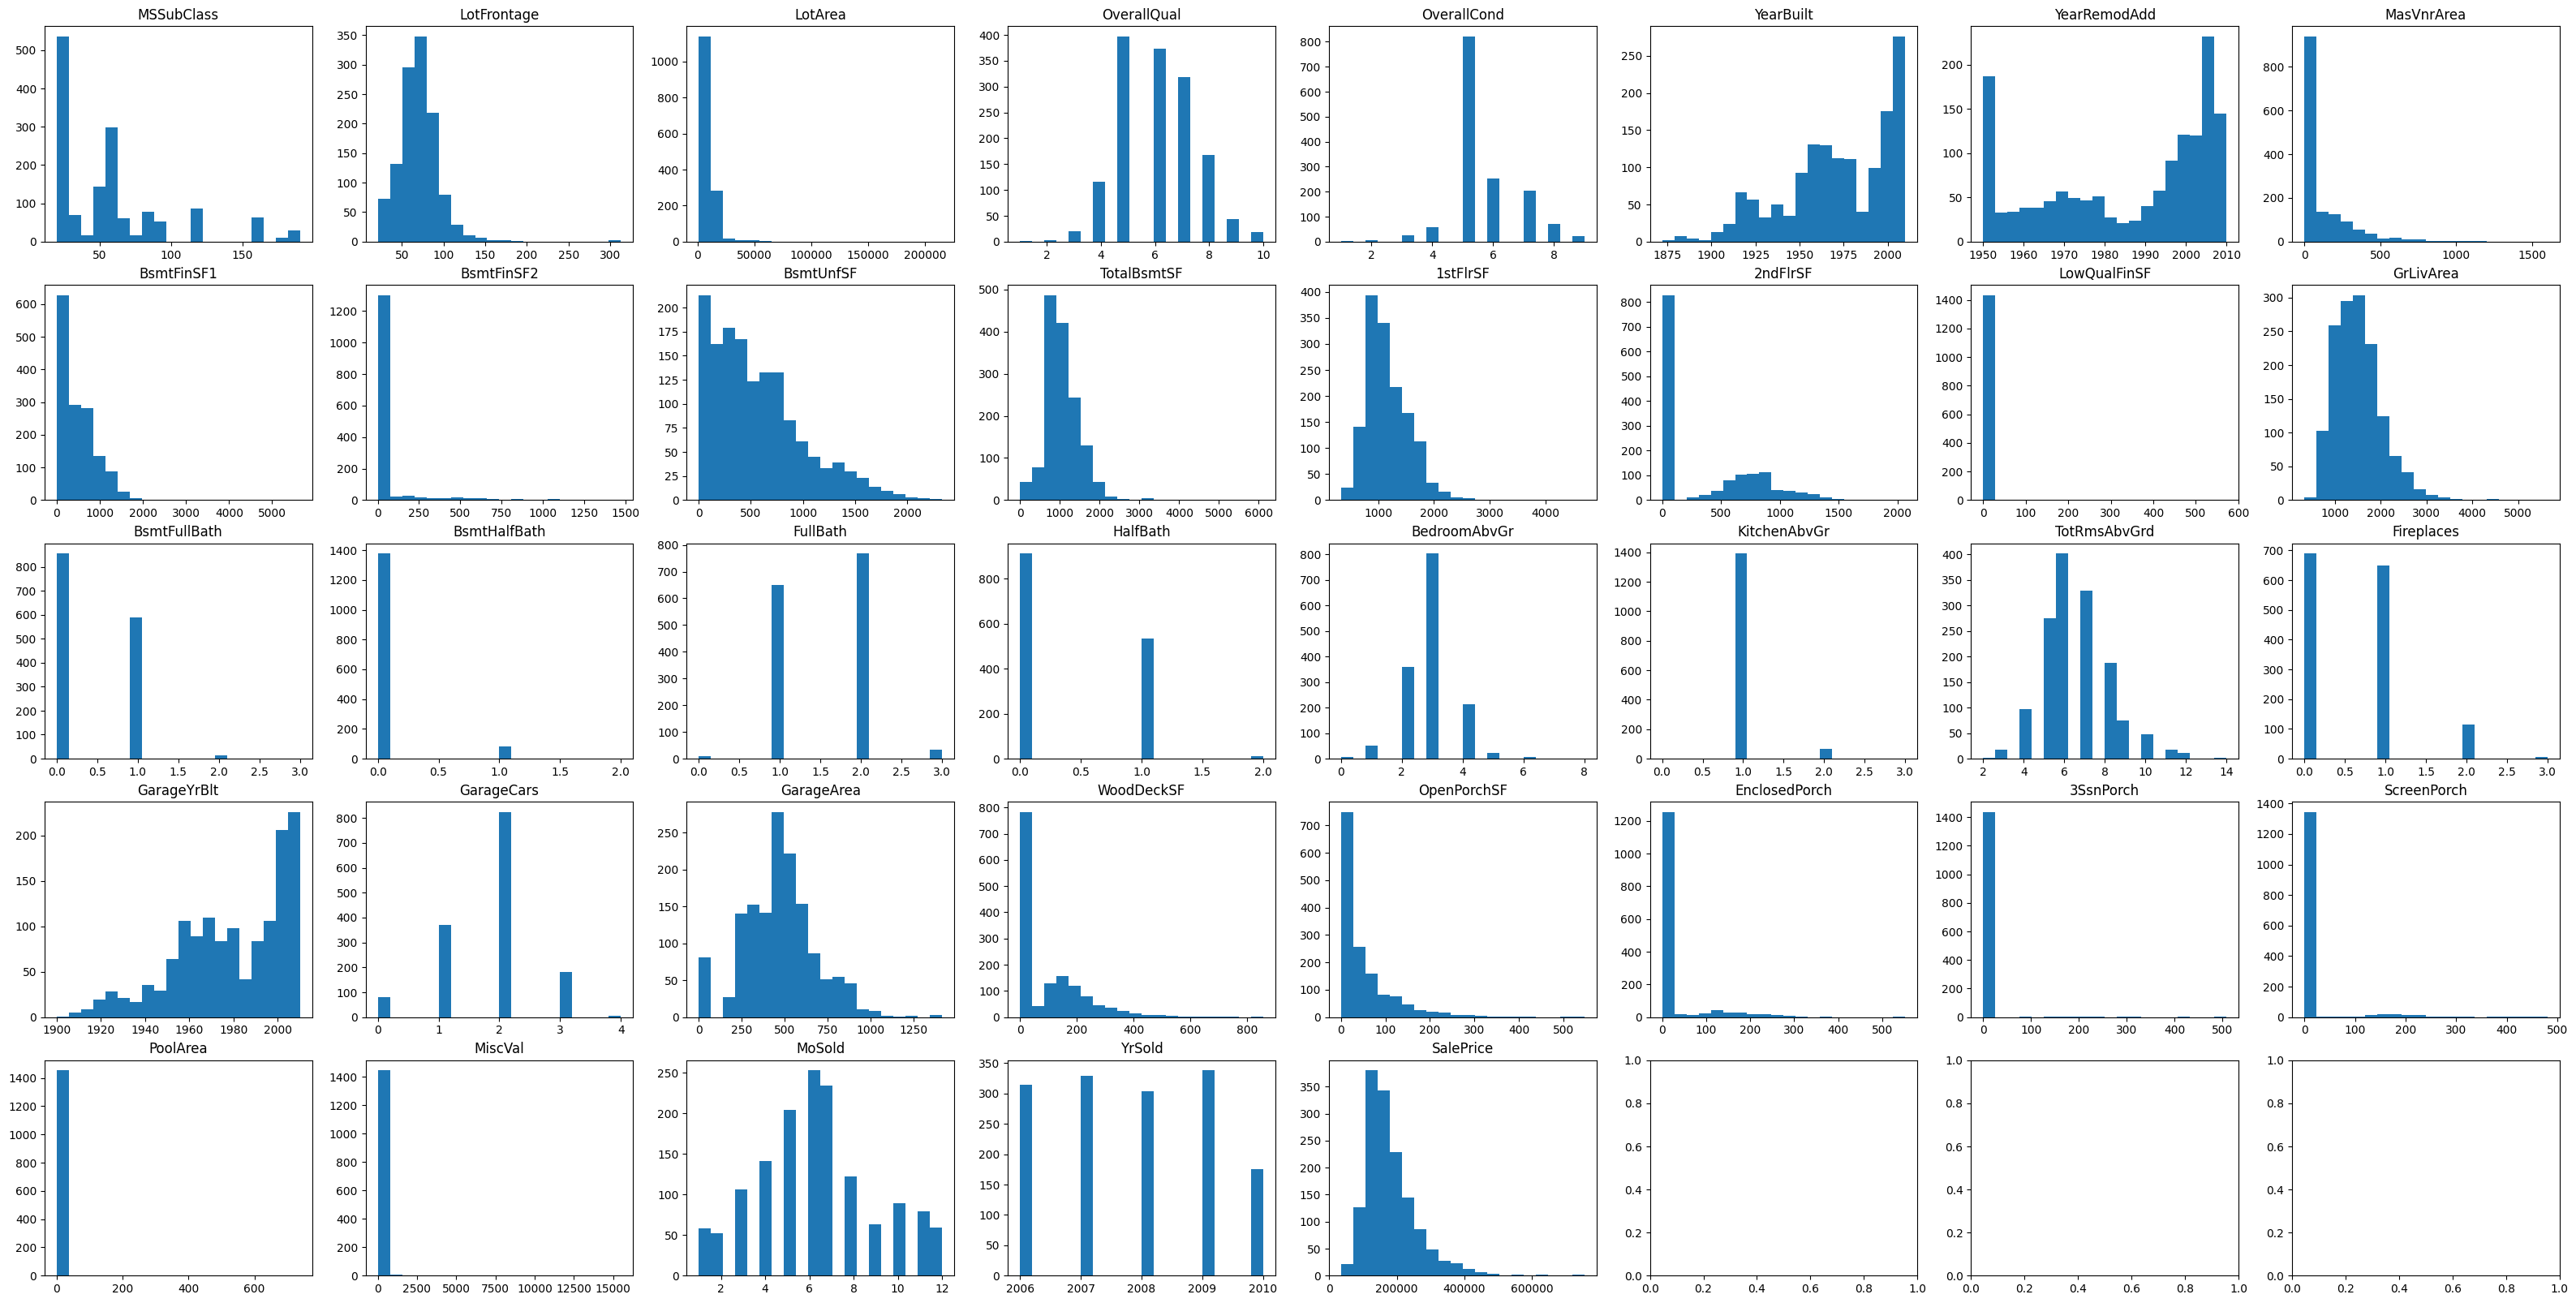

In [31]:
fig, axes = plt.subplots(5, 8, figsize=(40, 20))

for i, feature in enumerate(numerical):
    axes[i // 8, i % 8].hist(train[feature], bins=20)
    axes[i // 8, i % 8].set_title(feature)

### Categorical

In [32]:
for feature in categorical:
    print(train[feature].value_counts() / train.shape[0])
    print('-----------------------------------')

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: count, dtype: float64
-----------------------------------
Street
Pave    0.99589
Grvl    0.00411
Name: count, dtype: float64
-----------------------------------
Alley
Grvl    0.034247
Pave    0.028082
Name: count, dtype: float64
-----------------------------------
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: count, dtype: float64
-----------------------------------
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: count, dtype: float64
-----------------------------------
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: count, dtype: float64
-----------------------------------
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: count, dtype: float64
-----------------------------------
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

for i, feature in enumerate(categorical):
    axes[i // 3, i % 3].bar(df_train[feature].value_counts().index, df_train[feature].value_counts().values)
    axes[i // 3, i % 3].set_title(feature)
    if i in [7, 8]:
        axes[i // 3, i % 3].set_xticklabels(list(df_train[feature].value_counts().index), rotation=75)

## Baseline (without feature engineering)

In [58]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import rare_values as ra

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [92]:
df_train = train.copy()

In [93]:
df_train.drop('Id', axis=1, inplace=True)
df_train.ffill()
df_train.fillna('0', inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df_train.drop('SalePrice', axis=1), df_train['SalePrice'], test_size=0.3, random_state=42)

C:\Users\Авдеев\AppData\Local\Temp\ipykernel_88100\4021378926.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.fillna('0', inplace=True)


In [94]:
df_train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [95]:
std_scaler = StandardScaler()
ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
enc = ra.GroupingRareValues(cols=['MTRANS'], threshold=0.01)

In [96]:
pipe_num = Pipeline([('scaler', std_scaler)])

pipe_cat = Pipeline([('encoder', ord_encoder)])

col_transformer = ColumnTransformer([('num_preproc', pipe_num, numerical),
                                     ('cat_preproc', pipe_cat, categorical)])

In [97]:
X_train_transformed = col_transformer.fit_transform(X_train)
X_test_transformed = col_transformer.transform(X_test)

In [98]:
model = Ridge(random_state=42)
model.fit(X_train_transformed, y_train)

Ridge(random_state=42)

In [99]:
y_pred = model.predict(X_test_transformed)

print('RMSE=', np.sqrt(mean_squared_error(y_pred, y_test)))

RMSE= 32617.30346445328


Prediction

In [106]:
df_test = test.copy()

In [107]:
df_test.ffill()
df_test.fillna('0', inplace=True)

C:\Users\Авдеев\AppData\Local\Temp\ipykernel_88100\3479595562.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test.fillna('0', inplace=True)


In [108]:
test_transformed = col_transformer.transform(df_test)

y_pred = model.predict(test_transformed)

preds_df = pd.DataFrame({'Id': np.arange(1461, 2920), 'SalePrice': y_pred.flatten()}, index=None)
preds_df.to_csv('preds.csv', index=False)